In [1]:
import json
import requests
import csv
import pandas as pd
import os
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
pd.options.mode.chained_assignment = None
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import operator
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from pandas.tools.plotting import autocorrelation_plot

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
indicator_data = pd.read_csv('P:\\ADS\\Final\\Indicators_Cleaned.csv',header=0,parse_dates=True,index_col='Year',date_parser=dateparse, low_memory=False) 
indicator_data.head()

,CountryName,CountryCode,IndicatorCode,Value,Value Description
Year,,,,,
2016-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2015-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2014-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2013-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.518049,Agricultural land (% of land area)
2012-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.538146,Agricultural land (% of land area)


In [3]:
indicator_data.reset_index()
indicator_data.head()

,CountryName,CountryCode,IndicatorCode,Value,Value Description
Year,,,,,
2016-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2015-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2014-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2013-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.518049,Agricultural land (% of land area)
2012-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.538146,Agricultural land (% of land area)


In [4]:
brazil_df_ind5 = indicator_data[(indicator_data['IndicatorCode'].isin(['NY.GDP.MKTP.CD'])) &\
                                (indicator_data['CountryCode'] == 'BR')]

In [5]:
brazil_df_ind5.index

DatetimeIndex(['2016-01-01', '2015-01-01', '2014-01-01', '2013-01-01',
               '2012-01-01', '2011-01-01', '2010-01-01', '2009-01-01',
               '2008-01-01', '2007-01-01', '2006-01-01', '2005-01-01',
               '2004-01-01', '2003-01-01', '2002-01-01', '2001-01-01',
               '2000-01-01', '1999-01-01', '1998-01-01', '1997-01-01',
               '1996-01-01', '1995-01-01', '1994-01-01', '1993-01-01',
               '1992-01-01', '1991-01-01', '1990-01-01', '1989-01-01',
               '1988-01-01', '1987-01-01', '1986-01-01', '1985-01-01',
               '1984-01-01', '1983-01-01', '1982-01-01', '1981-01-01',
               '1980-01-01', '1979-01-01', '1978-01-01', '1977-01-01',
               '1976-01-01', '1975-01-01', '1974-01-01', '1973-01-01',
               '1972-01-01', '1971-01-01', '1970-01-01', '1969-01-01',
               '1968-01-01', '1967-01-01', '1966-01-01', '1965-01-01',
               '1964-01-01', '1963-01-01', '1962-01-01', '1961-01-01',
      

In [6]:
ts = brazil_df_ind5['Value'] 
ts1 = brazil_df_ind5[['Value']].copy() 
ts1.head()

,Value
Year,
2016-01-01,1.796187e+12
2015-01-01,1.803653e+12
2014-01-01,2.455993e+12
2013-01-01,2.472807e+12
2012-01-01,2.465189e+12


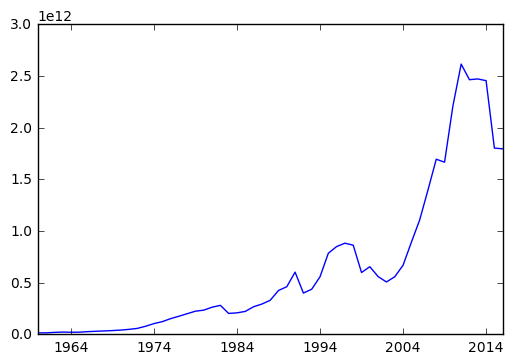

In [7]:
plt.plot(ts1)

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


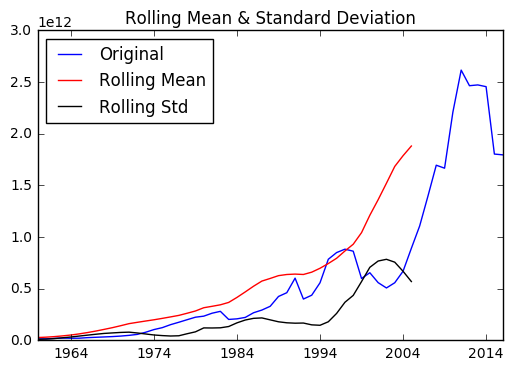

Results of Dickey-Fuller Test:
Test Statistic                 -1.553080
p-value                         0.507109
#Lags Used                      1.000000
Number of Observations Used    55.000000
Critical Value (10%)           -2.595670
Critical Value (5%)            -2.915731
Critical Value (1%)            -3.555273
dtype: float64


In [8]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
test_stationarity(ts1.Value)

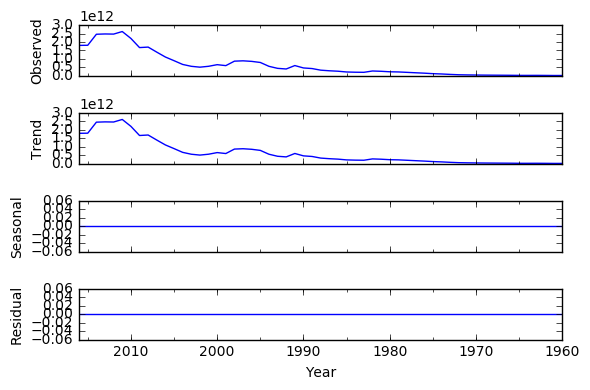

In [9]:
decomposition = sm.tsa.seasonal_decompose(ts1, model='additive')
fig = decomposition.plot()
plt.show()

## Taking Log

In [10]:
def logTransform(df):
    ts_log = np.log(df)
    plt.plot(ts_log)
    return ts_log

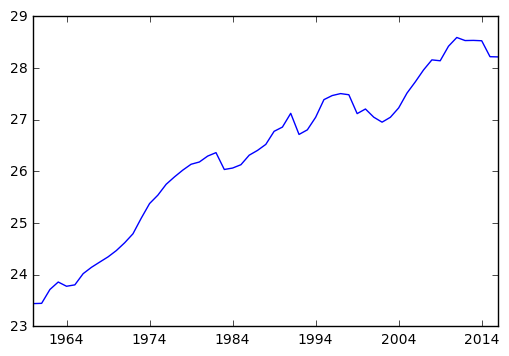

In [11]:
ts1_log = logTransform(ts1)

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


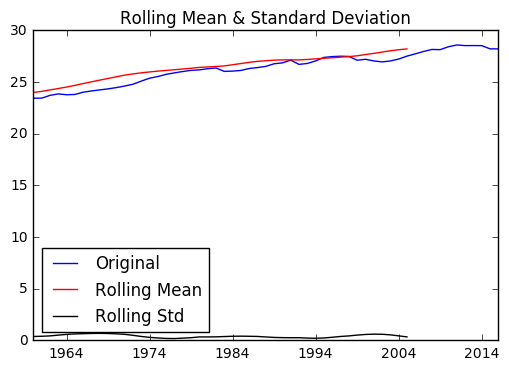

Results of Dickey-Fuller Test:
Test Statistic                  0.966985
p-value                         0.993905
#Lags Used                      0.000000
Number of Observations Used    56.000000
Critical Value (10%)           -2.595137
Critical Value (5%)            -2.914731
Critical Value (1%)            -3.552928
dtype: float64


In [12]:
test_stationarity(ts1_log.Value)

## Log first difference 

In [13]:
def logFirstDifference(ts1_log):
    ts1_log_diff = ts1_log - ts1_log.shift()
    ts1_log_diff.dropna(inplace=True)
    return ts1_log_diff

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


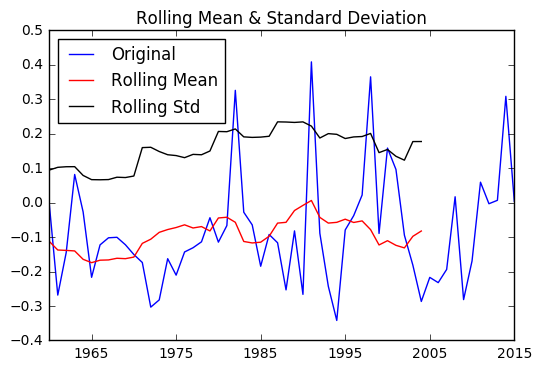

Results of Dickey-Fuller Test:
Test Statistic                -5.825024e+00
p-value                        4.098387e-07
#Lags Used                     0.000000e+00
Number of Observations Used    5.500000e+01
Critical Value (10%)          -2.595670e+00
Critical Value (5%)           -2.915731e+00
Critical Value (1%)           -3.555273e+00
dtype: float64


In [14]:
ts1_log_diff = logFirstDifference(ts1_log)
test_stationarity(ts1_log_diff.Value)

## First difference 

In [15]:
def firstDifference(df):
    #ts_first_diff = df - df.shift()
    #ts_first_diff.dropna(inplace=True)
    ts_first_diff = df.diff()
    ts_first_diff.dropna(inplace=True)
    return ts_first_diff



C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


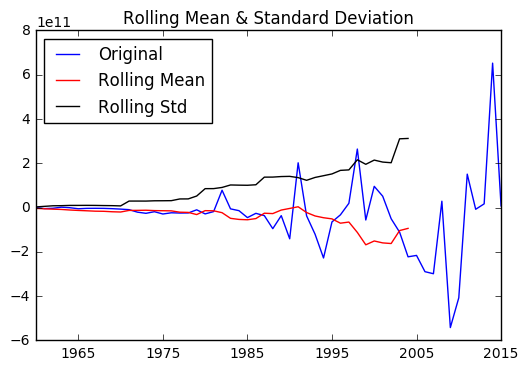

Results of Dickey-Fuller Test:
Test Statistic                -5.679952e+00
p-value                        8.531613e-07
#Lags Used                     0.000000e+00
Number of Observations Used    5.500000e+01
Critical Value (10%)          -2.595670e+00
Critical Value (5%)           -2.915731e+00
Critical Value (1%)           -3.555273e+00
dtype: float64


In [16]:
ts1_first_diff = firstDifference(ts1)
test_stationarity(ts1_first_diff.Value)

In [17]:
def expWeightedavg(ts1_log):
    expwighted_avg = pd.ewma(ts1_log, halflife=57)
    ts_log_ewma_diff = ts1_log - expwighted_avg
    ts1_log_diff.dropna(inplace=True)
    return ts1_log_diff

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(adjust=True,halflife=57,min_periods=0,ignore_na=False).mean()
  from ipykernel import kernelapp as app
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


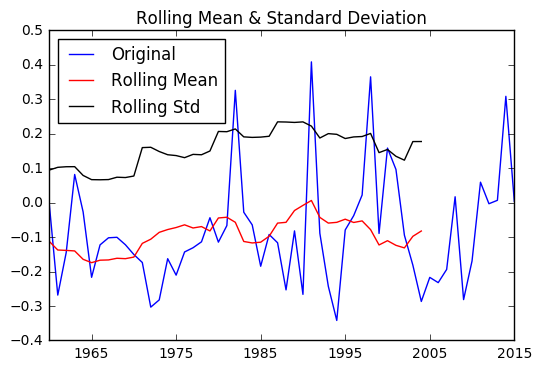

Results of Dickey-Fuller Test:
Test Statistic                -5.825024e+00
p-value                        4.098387e-07
#Lags Used                     0.000000e+00
Number of Observations Used    5.500000e+01
Critical Value (10%)          -2.595670e+00
Critical Value (5%)           -2.915731e+00
Critical Value (1%)           -3.555273e+00
dtype: float64


In [18]:
ts_log_ewma_diff = expWeightedavg(ts1_log)
test_stationarity(ts_log_ewma_diff.Value)

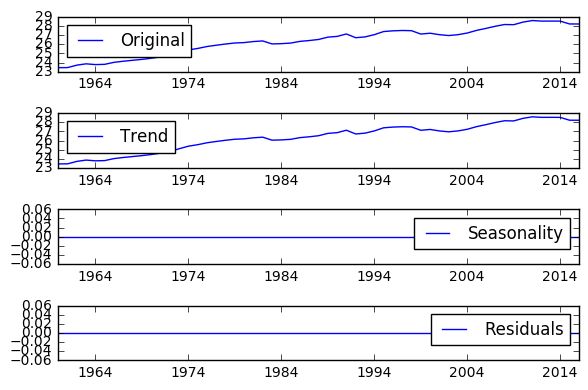

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts1_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts1_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [20]:
lag_acf = acf(ts1_log, nlags=10)
lag_pacf = pacf(ts1_log, nlags=10, method='ols')

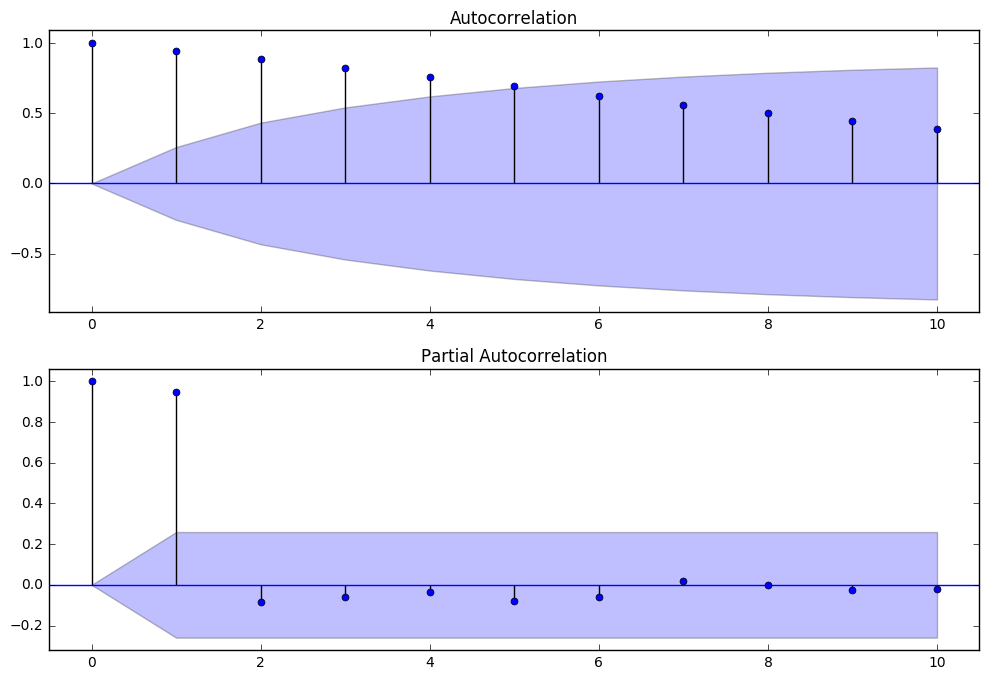

In [21]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts1_log, lags=10, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts1_log, lags=10, ax=ax2)

- As seen from the graph above both ACF and PACF are geometric hence this is an ARMA model

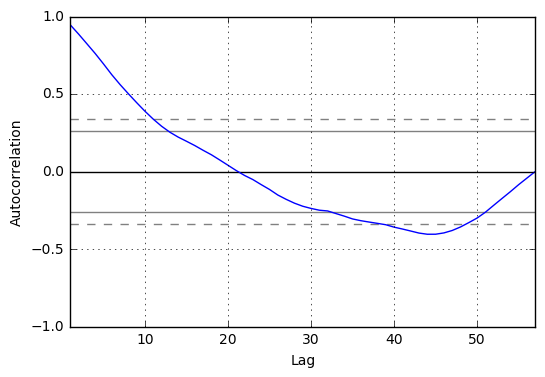

In [22]:
autocorrelation_plot(ts1_log)
plt.show()

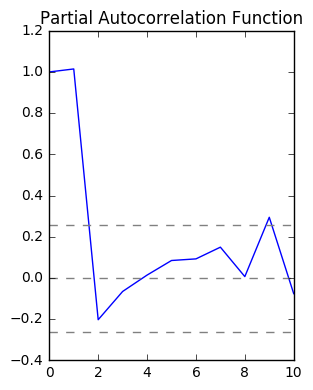

In [23]:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts1_log)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts1_log)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [46]:
aic_metric = pd.DataFrame({'Modelname':[],'AIC':[]})
aic_dict = {}

In [47]:
def cal_aic_metric(modelname,model):
    global aic_metric
    AIC = model.aic
    aic_dict[modelname] = AIC
    df_error = pd.DataFrame({'Modelname':[modelname],'AIC':[AIC]})
    aic_metric = pd.concat([aic_metric,df_error])
    return aic_metric

In [48]:
def AR_Model(ts):
    model = ARIMA(ts, order=(1, 0, 0))
    results_AR = model.fit(disp=0)
    cal_aic_metric('ARIMA(ts, order=(1, 0, 0))',results_AR)
    print('Lag: %s' % results_AR.k_ar)
    print('Coefficients: %s' % results_AR.params)
    #print(results_AR.summary())
    predict_MA_HPI = np.exp(results_AR.predict(10, 10, dynamic=True))
    print(predict_MA_HPI)
    plt.plot(ts1_log)
    plt.plot(results_AR.fittedvalues, color='red')
    #print(np.exp(results_AR.fittedvalues))
    print(results_AR.aic)
    return results_AR

C:\Users\priya\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:649: RuntimeWarning: divide by zero encountered in true_divide
  R_mat, T_mat)
C:\Users\priya\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:492: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
C:\Users\priya\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:493: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
C:\Users\priya\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:493: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
C:\Users\priya\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:494: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
C:\Users\priya\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:495: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
C:\Users\priya\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.p

Lag: 1
Coefficients: const          25.872353
ar.L1.Value     0.996772
dtype: float64
2006-01-01    1.387678e+12
Freq: -1AS-JAN, dtype: float64
-20.805608931486205


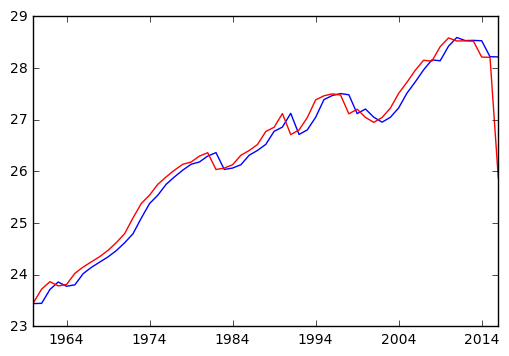

In [49]:
model_AR = AR_Model(ts1_log)

In [50]:
def MA_Model(ts):
    model = ARIMA(ts, order=(0,0, 5))
    results_MA = model.fit(disp=0)
    cal_aic_metric('ARIMA(ts, order=(0, 0, 5))',results_MA)
    print('Lag: %s' % results_MA.k_ar)
    print('Coefficients: %s' % results_MA.params)
    print(results_MA.summary())
    plt.plot(ts)
    plt.plot(results_MA.fittedvalues, color='red')
    return results_MA

Lag: 0
Coefficients: const          26.372576
ma.L1.Value     2.173467
ma.L2.Value     2.955853
ma.L3.Value     2.864031
ma.L4.Value     1.657359
ma.L5.Value     0.575430
dtype: float64
                              ARMA Model Results                              
Dep. Variable:                  Value   No. Observations:                   57
Model:                     ARMA(0, 5)   Log Likelihood                  -6.483
Method:                       css-mle   S.D. of innovations              0.243
Date:                Wed, 16 Aug 2017   AIC                             26.966
Time:                        19:20:08   BIC                             41.267
Sample:                    01-01-2016   HQIC                            32.524
                         - 01-01-1960                                         
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const          26.3726

C:\Users\priya\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


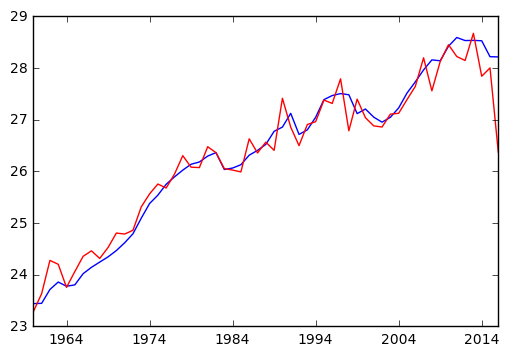

In [51]:
model_MA = MA_Model(ts1_log)

In [52]:
def Combined_Model(ts):
    model = ARIMA(ts, order=(1, 0, 5))  
    results_ARIMA = model.fit(disp=0)
    cal_aic_metric('ARIMA(ts, order=(1,0, 5))',results_ARIMA)
    print('Lag: %s' % results_ARIMA.k_ar)
    print('Coefficients: %s' % results_ARIMA.params)
    print(results_ARIMA.summary())
    plt.plot(ts)
    plt.plot(results_ARIMA.fittedvalues, color='red')
    return results_ARIMA

C:\Users\priya\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\priya\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1390: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
C:\Users\priya\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\priya\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\priya\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Lag: 1
Coefficients: const         -231.708036
ar.L1.Value      0.999999
ma.L1.Value      0.306159
ma.L2.Value      0.219906
ma.L3.Value      0.245603
ma.L4.Value      0.064821
ma.L5.Value      0.128731
dtype: float64
                              ARMA Model Results                              
Dep. Variable:                  Value   No. Observations:                   57
Model:                     ARMA(1, 5)   Log Likelihood                  14.435
Method:                       css-mle   S.D. of innovations              0.165
Date:                Wed, 16 Aug 2017   AIC                            -12.871
Time:                        19:20:17   BIC                              3.474
Sample:                    01-01-2016   HQIC                            -6.519
                         - 01-01-1960                                         
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------

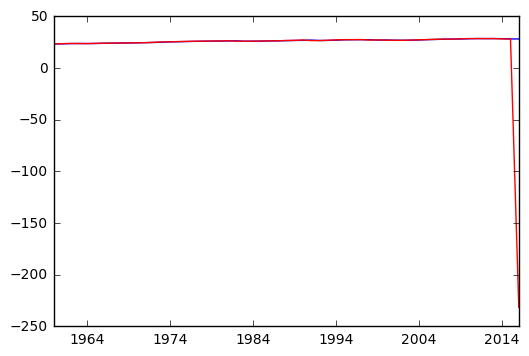

In [53]:
model_Combined = Combined_Model(ts1_log)

In [54]:
best_model =  min(aic_dict.items(),key=operator.itemgetter(1))[0]
print('Best Model is ', best_model)

Best Model is  ARIMA(ts, order=(1, 0, 0))


In [55]:
aic_metric

,AIC,Modelname
0,-20.805609,"ARIMA(ts, order=(1, 0, 0))"
0,26.965912,"ARIMA(ts, order=(0, 0, 5))"
0,-12.870702,"ARIMA(ts, order=(1,0, 5))"


In [56]:
#Forecast using Best Model
def forecast(model,numSteps):
    #model.forecast(steps=numSteps)
    output = model.forecast(steps=numSteps)[0]
    #output.tolist()
    output = np.exp(output)
    #out=normal(output)
    return output

In [59]:
forecast(model_AR,15)

array([  1.52849838e+10,   1.54049479e+10,   1.55254619e+10,
         1.56465251e+10,   1.57681370e+10,   1.58902970e+10,
         1.60130046e+10,   1.61362591e+10,   1.62600599e+10,
         1.63844063e+10,   1.65092978e+10,   1.66347335e+10,
         1.67607128e+10,   1.68872349e+10,   1.70142992e+10])

In [58]:
def FittedValues(model):
    fittedVal=model.fittedvalues
    #PredictedVal=normal(fittedVal)
    #PredictedVal= fittedVal.tolist()
    fittedVal = np.exp(fittedVal)
    print('Predicted existing values are:')
    return fittedVal
FittedValues(model_AR)

Predicted existing values are:


Year
2016-01-01    1.722742e+11
2015-01-01    1.782647e+12
2014-01-01    1.790033e+12
2013-01-01    2.435020e+12
2012-01-01    2.451636e+12
2011-01-01    2.444107e+12
2010-01-01    2.593331e+12
2009-01-01    2.190758e+12
2008-01-01    1.654852e+12
2007-01-01    1.683354e+12
2006-01-01    1.387678e+12
2005-01-01    1.101008e+12
2004-01-01    8.869115e+11
2003-01-01    6.663908e+11
2002-01-01    5.562052e+11
2001-01-01    5.061930e+11
2000-01-01    5.572503e+11
1999-01-01    6.526006e+11
1998-01-01    5.969817e+11
1997-01-01    8.592408e+11
1996-01-01    8.785525e+11
1995-01-01    8.460546e+11
1994-01-01    7.818051e+11
1993-01-01    5.559986e+11
1992-01-01    4.364827e+11
1991-01-01    3.995096e+11
1990-01-01    6.004277e+11
1989-01-01    4.604835e+11
1988-01-01    4.243548e+11
1987-01-01    3.297037e+11
1986-01-01    2.935770e+11
1985-01-01    2.677546e+11
1984-01-01    2.227573e+11
1983-01-01    2.088935e+11
1982-01-01    2.031959e+11
1981-01-01    2.812356e+11
1980-01-01    2.631996e

In [71]:
def normal(predictions_ARIMA_diff):
    #predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
    predictions_ARIMA_diff_cumsum = np.cumsum(np.concatenate((ts1.values[0], predictions_ARIMA_diff)))
    print('normalized')
    #predictions_ARIMA_diff_cumsum=np.absolute(predictions_ARIMA_diff_cumsum)
    return predictions_ARIMA_diff_cumsum